# Data Visualizations 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('results.csv')
df

,Company,High,Hour,Datetime
0,BYND,37.80,9,2022-05-02 09:55:00-04:00
1,BYND,37.99,10,2022-05-02 10:30:00-04:00
2,BYND,37.59,11,2022-05-02 11:30:00-04:00
3,BYND,37.33,12,2022-05-02 12:20:00-04:00
4,BYND,36.57,13,2022-05-02 13:05:00-04:00
...,...,...,...,...
80,TTD,59.94,13,2022-05-02 13:00:00-04:00
81,TTD,59.94,13,2022-05-02 13:10:00-04:00
82,TTD,60.28,14,2022-05-02 14:50:00-04:00
83,TTD,62.12,15,2022-05-02 15:55:00-04:00


<br></br>

## Highest Stock Price at the First Trading Hour (or Any Hour)

For this visualization I look at the highest stock prices of companies at 3pm.

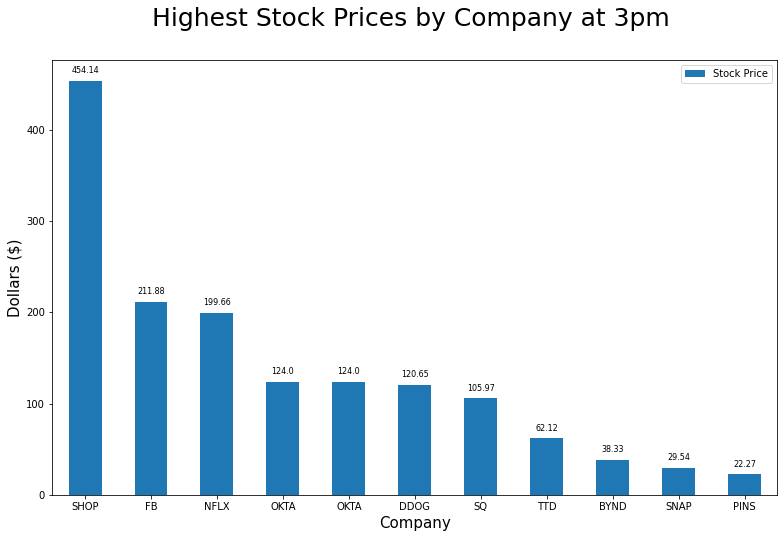

In [3]:
highest_at3 = df[df.Hour == 15]
highest_at3.drop(columns=["Hour","Datetime"], inplace=True)
highest_at3.set_index('Company', inplace=True)
highest_at3 = highest_at3.sort_values('High', ascending=False)
highest_at3.rename(columns={"High":"Stock Price"}, inplace=True)

ax = highest_at3.plot(kind='bar', figsize=(13,8))
plt.title("Highest Stock Prices by Company at 3pm \n", fontsize=25)
plt.xlabel("Company", size=15)
plt.xticks(rotation=0)
plt.ylabel("Dollars ($)", size=15)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=8)

plt.show()

<br></br>

## Highest Hourly Stock Price Trend

In [4]:
df_line = df[['Company','High','Hour']]
df_line = df_line.groupby(['Hour', 'Company']).last()

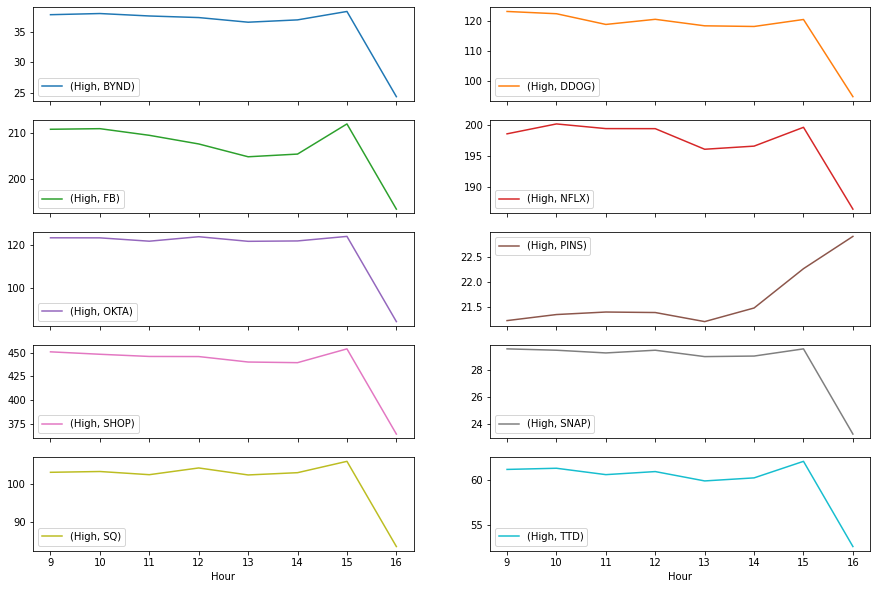

In [5]:
ax = df_line.unstack(level=1).plot(kind='line', subplots=True, 
                                   rot=0, figsize=(15,10), layout=(5,2))
plt.show()

<br></br>